In [54]:
import os
for dirname, _, filenames in os.walk('C:/Users/S Sai Manideep/Downloads/archive/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\0.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\1.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\10.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\10002.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\10016.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\10037.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\10038.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\10057.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\10063.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\10069.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\10100.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\10105.jpg
C:/Users/S Sai Manideep/Downloads/archive/images\images\train\angry\10115.j

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [55]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import cv2

tf.random.set_seed(23)

In [56]:
data_dir = 'C:/Users/S Sai Manideep/Downloads/archive/images/images'
print(os.listdir(data_dir))
classes_train = os.listdir(data_dir + "/train")
classes_valid = os.listdir(data_dir + "/validation")
print(f'Train Classes - {classes_train}')
print(f'Validation Classes - {classes_valid}')

['train', 'validation']
Train Classes - ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Validation Classes - ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [57]:
train_path = Path("C:/Users/S Sai Manideep/Downloads/archive/images/images/train")
valid_path = Path("C:/Users/S Sai Manideep/Downloads/archive/images/images/validation")

In [58]:
batch_size = 64
epochs = 40
img_channel = 3
img_width, img_height = (48,48)
train_dataset_main = data_dir + "/train"
valid_dataset_main = data_dir + "/validation"

In [59]:
def create_dataset_df(main_path, dataset_name):
    print(f"{dataset_name} is creating ...")
    df = {"img_path":[],"class_names":[]}
    for class_names in os.listdir(main_path):
            for img_path in glob.glob(f"{main_path}/{class_names}/*"):
                df["img_path"].append(img_path)
                df["class_names"].append(class_names)
    df = pd.DataFrame(df)
    print(f"{dataset_name} is created !")
    return df

In [60]:
train_df = create_dataset_df(train_dataset_main, "Train dataset")

Train dataset is creating ...
Train dataset is created !


In [61]:
valid_df=create_dataset_df(valid_dataset_main, "Validation dataset")

Validation dataset is creating ...
Validation dataset is created !


In [62]:
train_df.sample(5)

,img_path,class_names
2831,C:/Users/S Sai Manideep/Downloads/archive/imag...,angry
24954,C:/Users/S Sai Manideep/Downloads/archive/imag...,sad
11621,C:/Users/S Sai Manideep/Downloads/archive/imag...,happy
18391,C:/Users/S Sai Manideep/Downloads/archive/imag...,neutral
16886,C:/Users/S Sai Manideep/Downloads/archive/imag...,neutral


In [63]:
valid_df.sample(5)

,img_path,class_names
85,C:/Users/S Sai Manideep/Downloads/archive/imag...,angry
5864,C:/Users/S Sai Manideep/Downloads/archive/imag...,sad
3507,C:/Users/S Sai Manideep/Downloads/archive/imag...,happy
615,C:/Users/S Sai Manideep/Downloads/archive/imag...,angry
3800,C:/Users/S Sai Manideep/Downloads/archive/imag...,happy


In [64]:
print(f"train samples: {len(train_df)} \n validation samples: {len(valid_df)}")

train samples: 28821 
 validation samples: 7066


In [65]:
def vizualizing_images(df,n_rows,n_cols):
    plt.figure(figsize=(10,10))
    for i in range(n_rows*n_cols):
        index = np.random.randint(0, len(df))
        img = cv2.imread(df.img_path[index])
        class_nm = df.class_names[index]
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(img)
        plt.title(class_nm)
    plt.show()

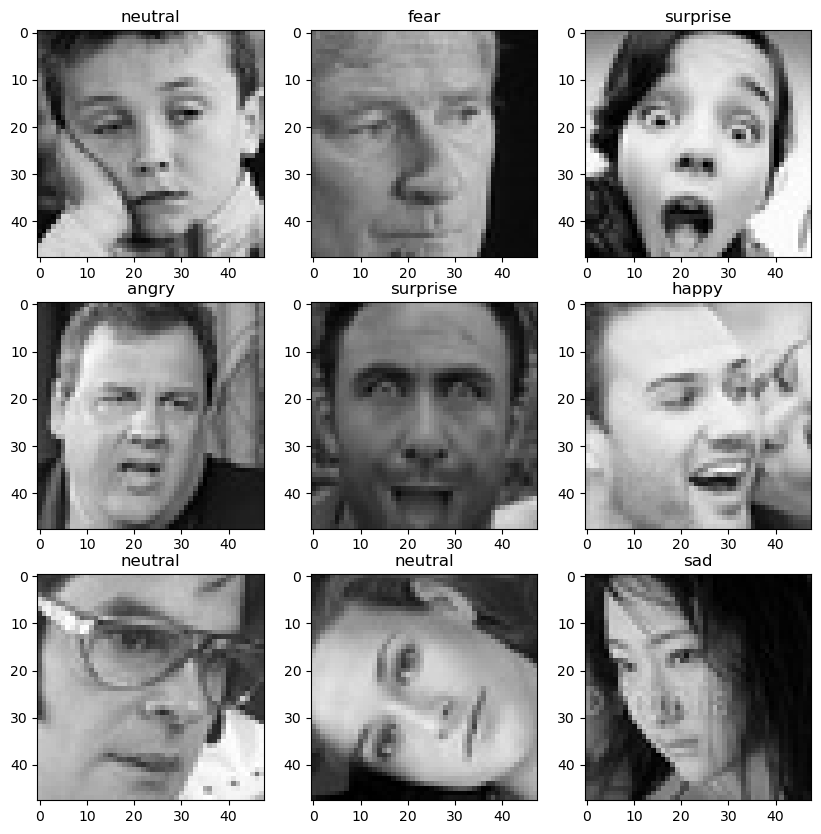

In [66]:
vizualizing_images(train_df, 3, 3)

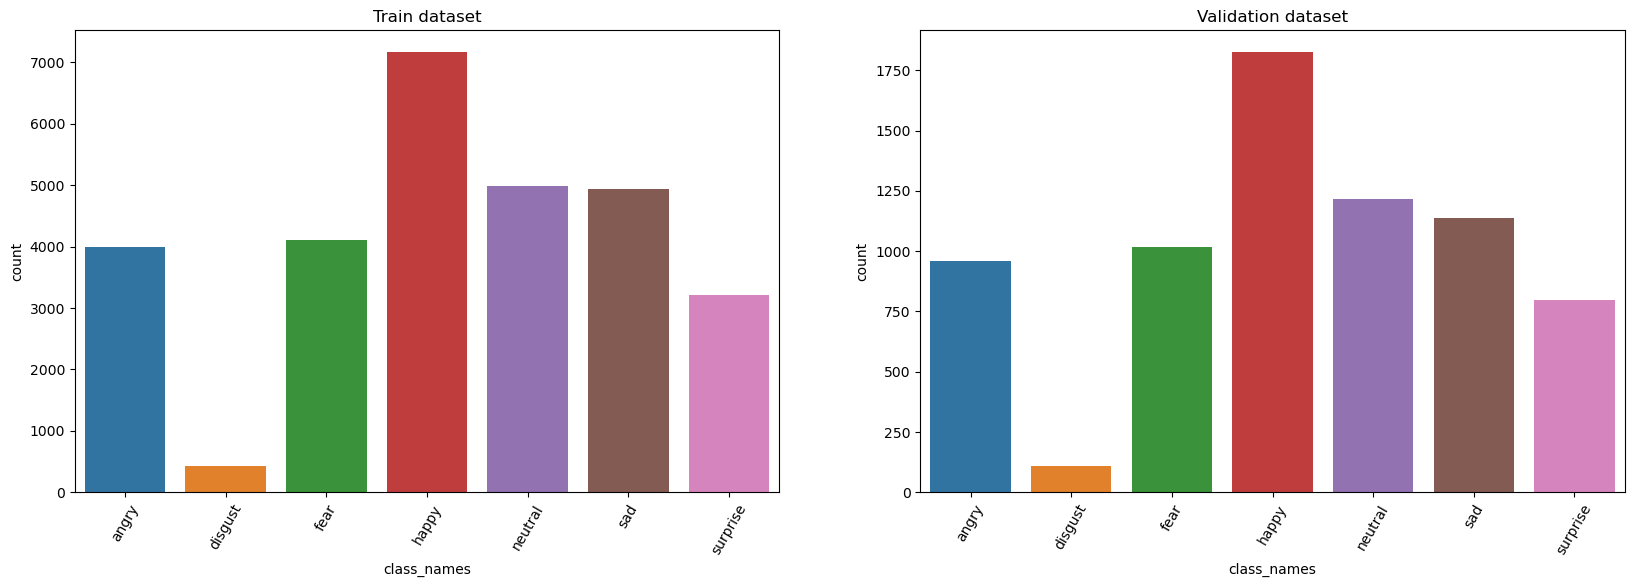

In [67]:
plt.figure(figsize=(20,6))
# train dataset
plt.subplot(1,2,1)
sns.countplot(data=train_df.sort_values("class_names"),x="class_names")
plt.title("Train dataset")
plt.xticks(rotation = 60)
# validation dataset
plt.subplot(1,2,2)
sns.countplot(data=valid_df.sort_values("class_names"),x="class_names")
plt.title("Validation dataset")
plt.xticks(rotation = 60)

plt.show()

In [68]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
train_df["class_names"] = Le.fit_transform(train_df["class_names"])

train_df["class_names"].value_counts()

3    7164
4    4982
5    4938
2    4103
0    3993
6    3205
1     436
Name: class_names, dtype: int64

In [69]:
valid_df["class_names"] = Le.transform(valid_df["class_names"])


In [70]:
train_labels = tf.keras.utils.to_categorical(train_df["class_names"])
valid_labels = tf.keras.utils.to_categorical(valid_df["class_names"])

In [71]:
train_labels[:10]

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [72]:
train_labels.sum(axis=0)

array([3993.,  436., 4103., 7164., 4982., 4938., 3205.], dtype=float32)

In [73]:
classTotals = train_labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

class_weight = {e : weight for e , weight in enumerate(classWeight)}
print(class_weight)

{0: 1.7941397, 1: 16.431192, 2: 1.7460395, 3: 1.0, 4: 1.4379767, 5: 1.4507898, 6: 2.2352574}


In [74]:
input_image = cv2.imread(train_df.img_path[0])

input_image.shape

(48, 48, 3)

In [75]:
def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [76]:
IMG_SIZE = 96 
BATCH_SIZE = 64

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.1, -0.05))
])

In [77]:
AUTOTUNE = tf.data.experimental.AUTOTUNE #to find a good allocation of its CPU budget across all parameters
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    
    return dataset

In [78]:
train_dataset = get_dataset(train_df["img_path"], train_labels)

#iter() returns an iterator of the given object
#next() returns the next number in an iterator
image , label = next(iter(train_dataset)) 
print(image.shape)
print(label.shape)

(64, 96, 96, 3)
(64, 7)


angry


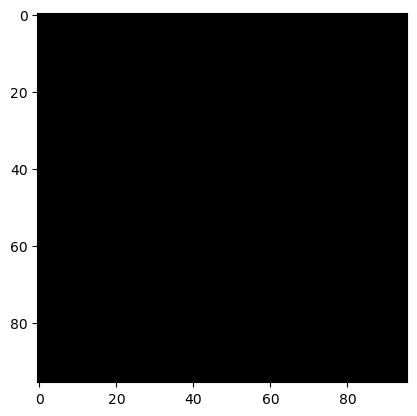

In [79]:
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [80]:
%time 
val_dataset = get_dataset(valid_df["img_path"] , valid_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

Wall time: 0 ns
(64, 96, 96, 3)
(64, 7)


angry


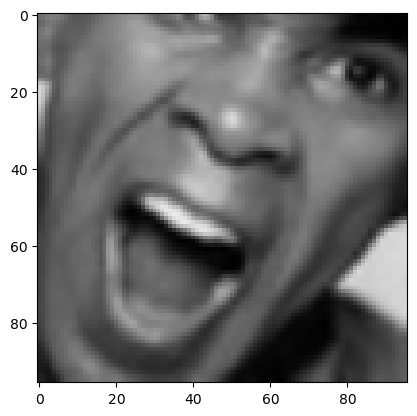

In [81]:
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [82]:
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 128)         1622144   
                                                                 
 global_average_pooling2d_1   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                      

In [83]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [84]:
len(train_labels),len(valid_labels)

(28821, 7066)

In [85]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=2,mode="auto")

In [86]:
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    callbacks=[early_stopping],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
450/450 [==============================] - 2457s 5s/step - loss: 2.8624 - accuracy: 0.8298 - precision: 0.8705 - recall: 0.7791 - val_loss: 11.7143 - val_accuracy: 0.1115 - val_precision: 0.1115 - val_recall: 0.1115
Epoch 2/12
450/450 [==============================] - 2598s 6s/step - loss: 1.9127 - accuracy: 0.8024 - precision: 0.8529 - recall: 0.7319 - val_loss: 11.7697 - val_accuracy: 0.1115 - val_precision: 0.1115 - val_recall: 0.1115
Epoch 3/12
450/450 [==============================] - 2494s 6s/step - loss: 1.5994 - accuracy: 0.8158 - precision: 0.8509 - recall: 0.7600 - val_loss: 19.6663 - val_accuracy: 0.1109 - val_precision: 0.1109 - val_recall: 0.1109


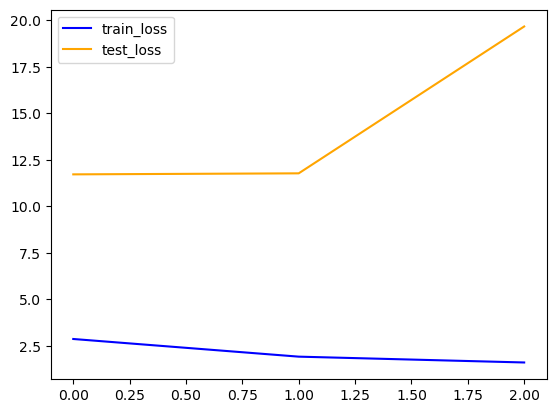

In [87]:
plt.plot(history.history['loss'],color='blue',label='train_loss')
plt.plot(history.history['val_loss'],color='orange',label='test_loss')
plt.legend(loc='upper left')
plt.show()

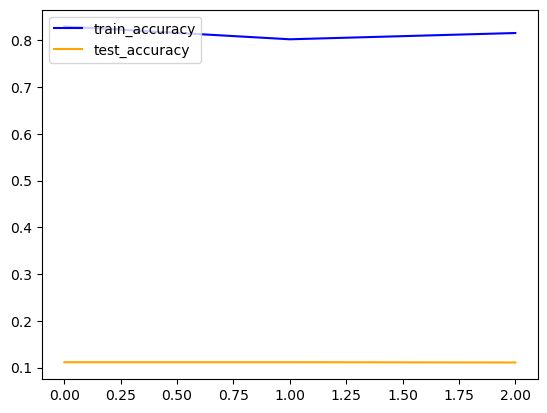

In [88]:
plt.plot(history.history['accuracy'],color='blue',label='train_accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='test_accuracy')
plt.legend(loc='upper left')
plt.show()

In [89]:
model.layers[0].trainable = False

In [90]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=2)

In [91]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 128)         1622144   
                                                                 
 global_average_pooling2d_1   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                      

In [92]:
#2nd train
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/8
450/450 [==============================] - ETA: 0s - loss: 1.4908 - accuracy: 0.8213 - precision: 0.8572 - recall: 0.7565
Epoch 1: val_loss improved from inf to 28.19199, saving model to best_weights.h5
450/450 [==============================] - 2384s 5s/step - loss: 1.4908 - accuracy: 0.8213 - precision: 0.8572 - recall: 0.7565 - val_loss: 28.1920 - val_accuracy: 0.1115 - val_precision: 0.1115 - val_recall: 0.1115
Epoch 2/8
450/450 [==============================] - ETA: 0s - loss: 1.5421 - accuracy: 0.7991 - precision: 0.8530 - recall: 0.7368
Epoch 2: val_loss improved from 28.19199 to 18.80349, saving model to best_weights.h5
450/450 [==============================] - 2400s 5s/step - loss: 1.5421 - accuracy: 0.7991 - precision: 0.8530 - recall: 0.7368 - val_loss: 18.8035 - val_accuracy: 0.1119 - val_precision: 0.1119 - val_recall: 0.1119
Epoch 3/8
450/450 [==============================] - ETA: 0s - loss: 1.4314 - accuracy: 0.7860 - precision: 0.8340 - recall: 0.7267
Epoch

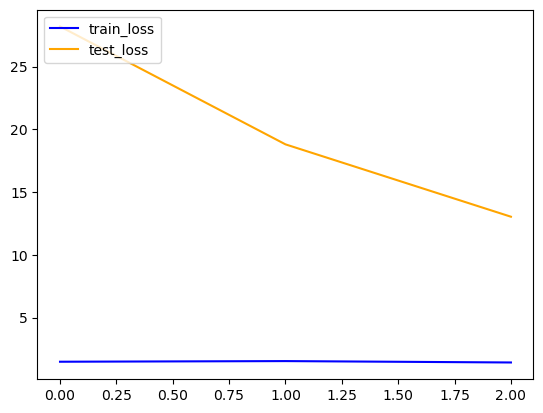

In [93]:
plt.plot(history.history['loss'],color='blue',label='train_loss')
plt.plot(history.history['val_loss'],color='orange',label='test_loss')
plt.legend(loc='upper left')
plt.show()

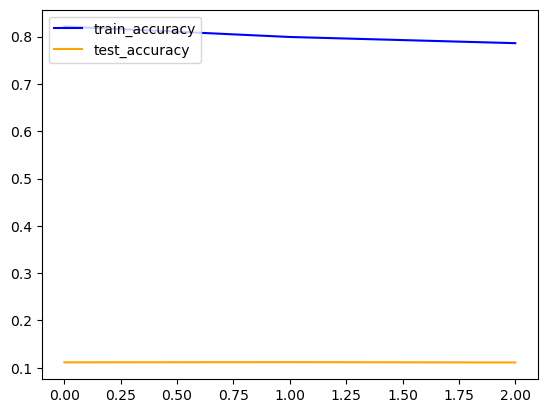

In [94]:
plt.plot(history.history['accuracy'],color='blue',label='train_accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='test_accuracy')
plt.legend(loc='upper left')
plt.show()

In [101]:
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model1 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(7, activation='softmax')
])

model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 256)         3244288   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 256)        0         
 2D)                                                             
                                                                 
 dense_10 (Dense)            (None, 1, 1, 256)         65792     
                                                                 
 dropout_4 (Dropout)         (None, 1, 1, 256)         0         
                                                                 
 dense_11 (Dense)            (None, 1, 1, 7)           1799      
                                                      

In [102]:
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [103]:
history2 = model1.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    callbacks=[early_stopping],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12


ValueError: in user code:

    File "C:\Users\S Sai Manideep\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\S Sai Manideep\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\S Sai Manideep\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\S Sai Manideep\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\S Sai Manideep\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\S Sai Manideep\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\S Sai Manideep\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\S Sai Manideep\anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\S Sai Manideep\anaconda3\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\S Sai Manideep\anaconda3\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 7) and (None, 1, 1, 7) are incompatible


In [104]:
from tensorflow.keras import models,layers
cnn=models.Sequential([
    layers.Conv2D(filters=256,kernel_size=(4,4),activation='relu',input_shape=(96,96,3)),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(filters=256,kernel_size=(4,4),activation='relu',input_shape=(96,96,3)),
    layers.MaxPooling2D((3,3)),
    
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(7,activation='relu')
]
    
)

In [105]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=2,mode="auto")

In [106]:
cnn.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [107]:
history1 = cnn.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    callbacks=[early_stopping],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
450/450 [==============================] - 3057s 7s/step - loss: nan - accuracy: 0.1342 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.1364 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/12
450/450 [==============================] - 3066s 7s/step - loss: nan - accuracy: 0.1389 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.1364 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/12
450/450 [==============================] - 3093s 7s/step - loss: nan - accuracy: 0.1389 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.1364 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/12
450/450 [==============================] - 3362s 7s/step - loss: nan - accuracy: 0.1389 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.1364 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


TypeError: 'dict' object is not callable

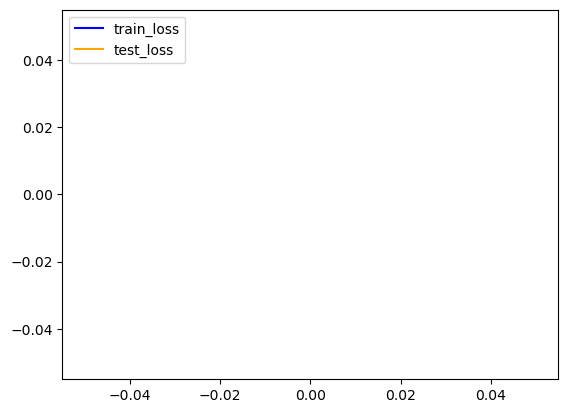

In [116]:
plt.plot(history1.history['loss'],color='blue',label='train_loss')
plt.plot(history1.history['val_loss'],color='orange',label='test_loss')
plt.legend(loc='upper left')
plt.show()

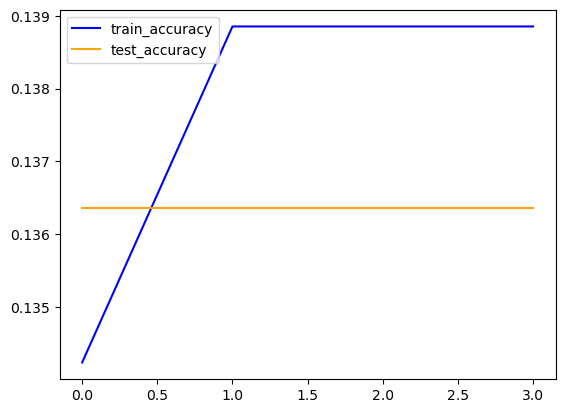

In [117]:
plt.plot(history1.history['accuracy'],color='blue',label='train_accuracy')
plt.plot(history1.history['val_accuracy'],color='orange',label='test_accuracy')
plt.legend(loc='upper left')
plt.show()

In [118]:
cnn.layers[0].trainable = False

In [119]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=2)

In [120]:
history1 = cnn.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/8
450/450 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1386 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1: val_loss did not improve from inf
450/450 [==============================] - 3567s 8s/step - loss: nan - accuracy: 0.1386 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.1364 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/8
450/450 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1389 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss did not improve from inf
450/450 [==============================] - 2849s 6s/step - loss: nan - accuracy: 0.1389 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.1364 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/8
 14/450 [..............................] - ETA: 42:48 - loss: nan - accuracy: 0.9004 - precision: 0.0000e+00 - recall: 0.0000e+00

KeyboardInterrupt: 

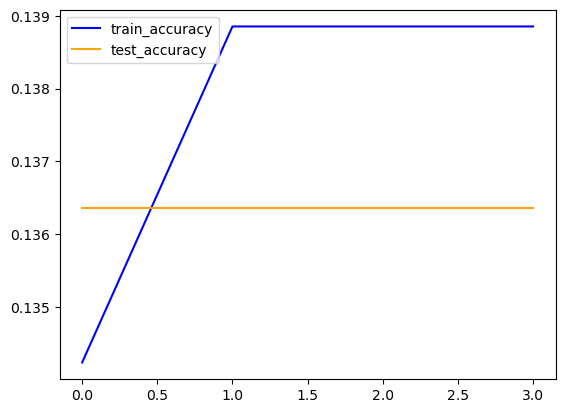

In [121]:
plt.plot(history1.history['accuracy'],color='blue',label='train_accuracy')
plt.plot(history1.history['val_accuracy'],color='orange',label='test_accuracy')
plt.legend(loc='upper left')
plt.show()